# Pipeline Example

In [1]:
#=================================================================
# Use Case
#================================================================= 

import pipeline.pipeline as p
import pandas as pd

data = pd.read_csv("Dataset_v3/blog/blog_2000_sent_Jane_rst.csv")

# Run data through pipeline to get metrics applicable for all datasets.
data = p.standardPipeline(data)

# For reading metrics, we require a sentence count column. Add the column
# yourself, depending on your needs, and add it as a second parameter.

data["sentenceCount"] = 2 # My sophisticated count estimation method
data = p.readabilityPipeline(data, "sentenceCount")

# This function will drop columns that are artifacts of the creation of other
# columns.

#data = p.dropIntermediateCols(data)
data.head()

[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/haileywu/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haileywu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/haileywu/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/haileywu/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Unnamed: 0,Text,probpercentage,words,avgWordLength,sentenceLengthByChar,specicalCharacterCount,avgSyllablesPerWord,countFunctionalWords,hapaxLegemenaTuple,...,yulesK,simpsonsIndex,wordCount,uniqueWordCount,shannonEntropy,sentenceCount,gunningFoxIndex,daleChallReadability,fleschReadingEase,fleschCincadeGradeLevel
0,0,In het kader van kernfusie op aarde...,0.02586,"[In, het, kader, van, kernfusie, op, aarde:, M...",6.269231,208,16,1.785714,0.071429,"(333.22045101752036, 0.8571428571428571)",...,7193.877551,NaN,28,26,3.233183,2,11.314286,18.429114,41.553571,10.941429
1,1,Date: 7 Feb 1994 07:41:14 ORG Original file d...,0.00127,"[Date:, 7, Feb, 1994, 07:41:14, ORG, Original,...",4.833333,70,4,1.583333,0.000000,"(248.49066497880003, 1.0)",...,9166.666667,NaN,12,12,2.484907,2,9.066667,17.092433,66.795000,5.433333
2,2,Seemed to be a transcript of a 'Seven Days' ar...,0.00127,"[Seemed, to, be, a, transcript, of, a, 'Seven,...",7.000000,52,3,1.500000,0.500000,"(230.25850929940458, 0.8)",...,5800.000000,NaN,10,9,2.163956,2,6.000000,11.779500,74.860000,4.060000
3,3,Poorly formatted and corrupted.,2.27424,"[Poorly, formatted, and, corrupted.]",8.333333,31,1,2.250000,0.250000,"(138.62943611198907, 1.0)",...,7500.000000,NaN,4,4,1.386294,2,20.800000,15.578200,14.455000,11.740000
4,4,I have added the text between 'examine under a...,0.00128,"[I, have, added, the, text, between, 'examine,...",6.444444,105,7,1.500000,0.500000,"(289.03717578961647, 1.0)",...,9444.444444,NaN,18,18,2.890372,2,8.044444,10.223456,70.800000,5.620000


In [10]:
data.probpercentage.describe()

count    34033.000000
mean        13.094303
std         32.905662
min          0.000870
25%          0.001280
50%          0.001290
75%          0.028440
max         99.985977
Name: probpercentage, dtype: float64

In [2]:
del data['hapaxLegemenaTuple']
del data['hapaxDisLegemenaTuple']

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize
import collections as coll

def SimpsonsIndex(text):
    words = RemoveSpecialCHs(text)
    freqs = coll.Counter()
    freqs.update(words)
    N = len(words)
    n = sum([1.0 * i * (i - 1) for i in freqs.values()])
    if N > 1:
        D = 1 - (n / (N * (N - 1)))
        return D
    else:
        return None

def RemoveSpecialCHs(text):
    text = word_tokenize(text)
    st = [",", ".", "'", "!", '"', "#", "$", "%", "&", "(", ")", "*", "+", "-", ".", "/", ":", ";", "<", "=", '>', "?",
          "@", "[", "\\", "]", "^", "_", '`', "{", "|", "}", '~', '\t', '\n']

    words = [word for word in text if word not in st]
    return words


data['simpsonsIndex'] = data.apply(lambda row : SimpsonsIndex(row.Text), axis = 1)


In [4]:
data.isnull().sum()

Unnamed: 0                    0
Text                          0
probpercentage                0
words                         0
avgWordLength                97
sentenceLengthByChar          0
specicalCharacterCount        0
avgSyllablesPerWord           0
countFunctionalWords          0
hapaxLegemena                 0
honoreMeasureR                0
hapaxDisLegemena              0
sichelesMeasureS              0
avgWordFrequencyClass         0
typeTokenRatio                0
brunetsMeasureW            1454
yulesK                        0
simpsonsIndex              1403
wordCount                     0
uniqueWordCount               0
shannonEntropy                0
sentenceCount                 0
gunningFoxIndex               0
daleChallReadability          0
fleschReadingEase             0
fleschCincadeGradeLevel       0
dtype: int64

In [5]:
del data['brunetsMeasureW']
del data['simpsonsIndex']
del data['avgWordLength']


In [58]:
data.shape

(289285, 24)

In [6]:
data.to_csv("Dataset_v3/metrics/blog_2000_sent_Jane_metrics.csv")


In [13]:
correct = data[data.probpercentage>=50]

In [14]:
correct['avgWordFrequencyClass'].describe()

count    4308.000000
mean        1.394685
std         0.408201
min         1.000000
25%         1.000000
50%         1.000000
75%         1.809524
max         2.839623
Name: avgWordFrequencyClass, dtype: float64

In [15]:
correct['typeTokenRatio'].describe()

count    4308.000000
mean        0.941534
std         0.075624
min         0.222222
25%         0.900000
50%         1.000000
75%         1.000000
max         1.000000
Name: typeTokenRatio, dtype: float64

In [17]:
correct['hapaxLegemena'].describe()

count    4308.000000
mean        0.891990
std         0.133158
min         0.083333
25%         0.800000
50%         1.000000
75%         1.000000
max         1.000000
Name: hapaxLegemena, dtype: float64

In [18]:
correct['yulesK'].describe()

count    4308.000000
mean     7130.053092
std      2019.727678
min         0.000000
25%      5872.576177
50%      7469.135802
75%      8888.888889
max      9722.222222
Name: yulesK, dtype: float64

## most important

In [5]:
X = data.iloc[:,5:]  #independent columns
del X['hapaxLegemenaTuple']
del X['hapaxDisLegemenaTuple']
y = data.Label

In [6]:
X.columns

Index(['avgWordLength', 'sentenceLengthByChar', 'specicalCharacterCount',
       'avgSyllablesPerWord', 'countFunctionalWords', 'hapaxLegemena',
       'honoreMeasureR', 'hapaxDisLegemena', 'sichelesMeasureS',
       'avgWordFrequencyClass', 'typeTokenRatio', 'brunetsMeasureW', 'yulesK',
       'simpsonsIndex', 'wordCount', 'uniqueWordCount', 'shannonEntropy',
       'sentenceCount', 'gunningFoxIndex', 'daleChallReadability',
       'fleschReadingEase', 'fleschCincadeGradeLevel'],
      dtype='object')

[0.0536754  0.04272112 0.0988167  0.06286338 0.06051533 0.04372725
 0.03550632 0.03903883 0.03985672 0.05416743 0.04332663 0.04037961
 0.04465756 0.05067599 0.03533169 0.03905616 0.0481403  0.
 0.03845184 0.05072879 0.04205403 0.03630892]


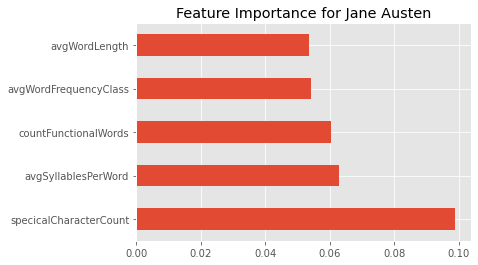

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance for Jane Austen")
plt.show()

In [61]:
feat_importances.nlargest(5)

specicalCharacterCount    0.098817
avgSyllablesPerWord       0.062863
countFunctionalWords      0.060515
avgWordFrequencyClass     0.054167
avgWordLength             0.053675
dtype: float64

In [62]:
top5 = ['countFunctionalWords','avgSyllablesPerWord','specicalCharacterCount','avgWordFrequencyClass','avgWordLength']

# Conversion to JSON

In [63]:
data = data[data.Label == 1]

In [64]:
data['Author']= 'Mark_Twain'

In [65]:
#==================================================================================
# Convert to Longform
#==================================================================================
from pipeline import metrics as m

data = m.input_to_stats(data, m.METRICS)
data.head()

,Author,Metric,Statistic,Value
0,Mark_Twain,avgSyllablesPerWord,mean,1.375951
1,Mark_Twain,avgWordFrequencyClass,mean,3.108803
2,Mark_Twain,avgWordLength,mean,5.710376
3,Mark_Twain,brunetsMeasureW,mean,45.862096
4,Mark_Twain,countFunctionalWords,mean,0.396333


In [66]:
data = data[data.Metric.isin(top5)]

In [67]:
len(data)

30

In [68]:
#==================================================================================
# Save
#==================================================================================

data.to_json("Metrics/v2/MarkTwain_top5.json", orient="records")